In [ ]:
import pandas as pd
x=pd.read_csv("heart.csv")
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
print(x.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA
import seaborn as sns  # to plot the heat maps
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(x)) #scaling the data
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-1.026698
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-1.026698
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-1.026698
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-1.026698
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,-1.026698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,0.973997
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-1.026698
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-1.026698
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,0.973997


<Axes: >

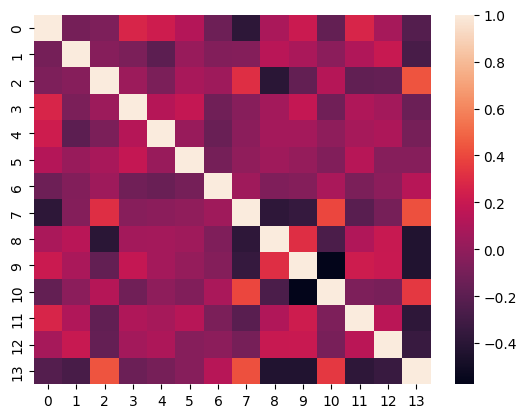

In [ ]:
sns.heatmap(scaled_data.corr())

In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
print(data_pca)

           PC1       PC2       PC3
0     0.118743 -1.432183 -1.454860
1     2.787544 -0.316311 -0.438908
2     3.181349 -0.933065  1.360438
3     0.086016 -0.588894 -1.327176
4     2.295329  2.074792  0.314155
...        ...       ...       ...
1020 -1.074482 -0.476481 -0.039894
1021  2.646205 -0.787069 -0.190847
1022  1.643527 -1.406663  0.318134
1023 -1.896458  0.067734  0.656259
1024  1.374195 -1.748147  0.289533

[1025 rows x 3 columns]


<Axes: >

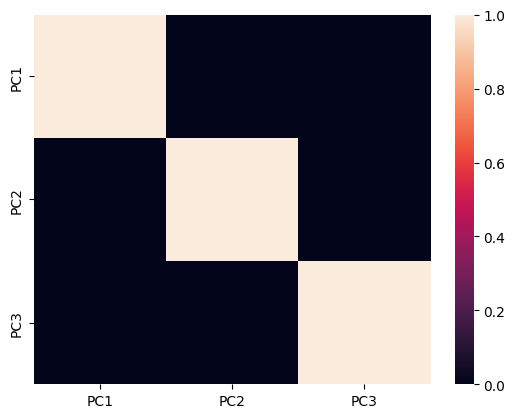

In [ ]:
sns.heatmap(data_pca.corr())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_pca,x.iloc[:,-1:],test_size=0.3)
print(y_train)

     target
262       1
568       1
483       1
68        1
703       1
..      ...
106       0
373       0
76        1
561       1
416       1

[717 rows x 1 columns]


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
res=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(res,y_test))

0.9545454545454546


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
